OPEN ENDED LAB 2


In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Load the dataset.


In [39]:
import pandas as pd                                        # I run all the libraries that are going to be used
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import zscore


In [40]:
df=pd.read_csv('/content/drive/MyDrive/Student_performance_in_exam/StudentsPerformance.csv')             # upload dataset in csv form

In [41]:
df.head(10)  # check the datset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [42]:
df.columns               # all columns in the datset

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [43]:
df.describe()     # all satatistic about datset

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [44]:
df.shape                   # datset size

(1000, 8)

Remove constant features using Variance Threshold.

In [45]:
selector = VarianceThreshold(threshold=3)

df_numeric = df.select_dtypes(include=np.number)

df_reduced = selector.fit_transform(df_numeric)

In [46]:
df.shape

(1000, 8)

Handle missing values: - Replace missing numerical values with mean. - Replace missing categorical values with mode.

In [47]:
df.isnull().sum()                       # checking null values to repalce mean and mode

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [48]:
df.describe(include='object')              # finding object columns for replacing null values with mode

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [49]:

df.fillna(df.mean(numeric_only=True), inplace=True)                        # fill null values with mean on numeric values columns



df['gender']=df['gender'].fillna(df['gender'].mode()[0])               # fill mode on categorical coulmns
df['race/ethnicity'] = df['race/ethnicity'].fillna(df['race/ethnicity'].mode()[0])
df['parental level of education'] = df['parental level of education'].fillna(df['parental level of education'].mode()[0])
df['lunch'] = df['lunch'].fillna(df['lunch'].mode()[0])
df['test preparation course'] = df['test preparation course'].fillna(df['test preparation course'].mode()[0])


 Remove outliers from at least two numerical columns using the Z-score method
(threshold = 3)

In [50]:

z_scores = zscore(df[['math score', 'reading score']])            # Calculate Z scores for math and reading scores


df = df[(np.abs(z_scores) < 3).all(axis=1)]        # Keep only rows where Z-score < 3
df.shape                                            # after removing outliers i check the shape of datset

(994, 8)

Generate the following plots using Seaborn or Matplotlib: - Histogram of a numerical column. - Boxplot for visualizing outliers in a numerical column. - Countplot for a categorical feature

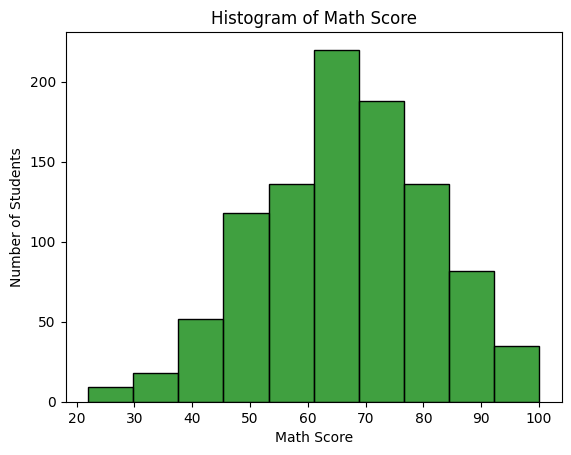

In [51]:
sns.histplot(df['math score'], bins=10 ,color='g')
plt.title('Histogram of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
# most of the student score are between 50 to 90

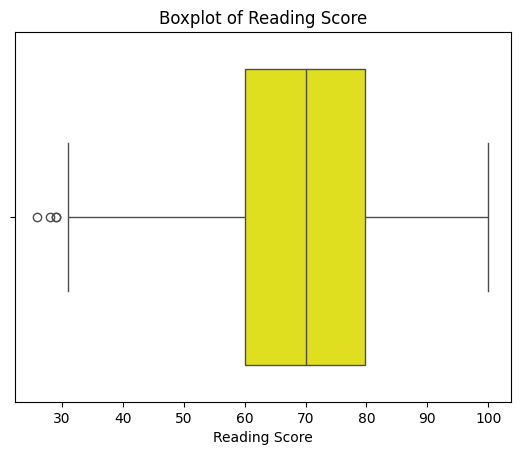

In [52]:
sns.boxplot(x=df['reading score'],data=df, color='yellow')
plt.title('Boxplot of Reading Score')
plt.xlabel('Reading Score')
plt.show()


In [ ]:
# few outliers in the reading score columns as we romve outliers from another two numerical columns

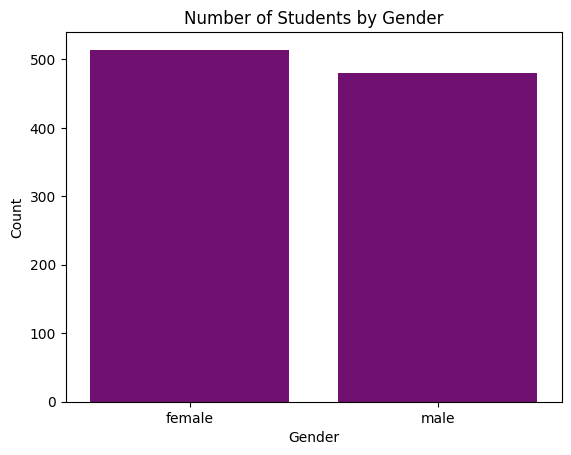

In [53]:


sns.countplot(x='gender', data=df, color='purple')
plt.title('Number of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



In [54]:
#this plot show male and female both have same ratio